In [6]:
#coding=utf-8

from rqalpha.api import *
import traceback
from datetime import *
from sqlalchemy import create_engine
import pandas as pd
from rqalpha.utils.logger import user_log


def dependency():
    return []

def market(market=90):
    if market == 83:
        return 'XSHG'
    elif market == 90:
        return 'XSHE'
    else:
        return ""

def compute(startdt,enddt,context):
    '''
    PE
    :param startdt:
    :param enddt:
    :return:
    '''
    #context.config 对应配置的extra部分
    jydbConf = context.config.jydb
    _jyConnStr = "mysql+pymysql://%s:%s@%s:%s/%s"%(jydbConf.user,jydbConf.passwd,jydbConf.host,jydbConf.port,jydbConf.db)
    engine = create_engine(_jyConnStr)
    
    _category = [1, ]
    _sectors = [1, 2, 6]
    _sql = "SELECT p.TradingDay as date,p.PE as value,a.SecuCode as code,a.SecuMarket" \
                   " FROM LC_DIndicesForValuation as p inner join secumain as a "\
                    "on a.innerCode=p.innerCode where a.SecuMarket in (83,90) " \
                   "and a.SecuCategory in (%s) and a.ListedSector in (%s) " \
                   "and a.ListedState!=9 and p.TradingDay between '%s' and '%s' order by p.TradingDay asc" % (
                        ",".join([str(i) for i in _category]), ",".join([str(i) for i in _sectors])
                        ,startdt.strftime('%Y-%m-%d'),
                       enddt.strftime('%Y-%m-%d'))
#     print(_sql)
    _res = pd.read_sql(sql=_sql,con = engine)
#     market = {90:"XSHE",83:"XSHG"}
    _res.code = _res.code + "." + _res.SecuMarket.apply(market)
    _res = _res.drop(['SecuMarket'],axis=1).set_index(['date','code']).unstack(level=-1)
    _res.columns = _res.columns.droplevel(level=0)
    return _res

In [ ]:
range()

In [7]:
# test
config= {"extra":{"jydb":{"host":"172.18.44.5","port":3306,"user":"liangh","passwd":"huaxun!@#db","db":"jydb"}}}
from rqalpha.utils import RqAttrDict
conf = RqAttrDict(config)
from rqalpha.mod.rqalpha_mod_alphaStar_factors.factor_context import FactorContext
context = FactorContext(conf)
context.registerDepending(dependency())
res =  compute(datetime(2017,1,1),datetime(2017,2,1),context)
res.head(10)

code,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,603986.XSHG,603987.XSHG,603988.XSHG,603989.XSHG,603990.XSHG,603993.XSHG,603996.XSHG,603997.XSHG,603998.XSHG,603999.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,6.7407,9.5646,48.2571,26.5261,11.4471,42.4395,30.5768,-79.2387,137.9092,20.9009,...,91.2327,65.4678,1136.0236,36.9102,85.8684,51.2801,47.7668,25.6374,158.9808,129.2768
2017-01-04,6.7407,9.6200,48.5285,27.2252,11.6010,43.0412,30.7405,-80.6780,138.6173,21.1596,...,91.2327,64.7987,1249.6898,37.0290,86.1638,51.9639,48.5919,25.8974,159.2468,131.2987
2017-01-05,6.7480,9.6569,48.2463,27.0698,11.6247,42.6672,30.8060,-79.8447,138.2633,20.9440,...,91.2327,62.7326,1240.2708,36.0587,86.7079,51.9639,49.2757,25.8064,157.2961,129.7070
2017-01-06,6.7186,9.5231,47.7251,27.3028,11.8496,41.3826,31.0351,-79.6174,136.4929,21.8279,...,91.2327,58.8757,1209.1403,35.6132,82.4480,51.5536,49.1814,25.5074,155.7887,130.8255
2017-01-09,6.7333,9.5323,46.6938,27.4582,11.7786,40.7972,31.1988,-80.0720,137.7322,21.9573,...,91.2327,58.6199,1290.0796,35.7914,82.2614,51.8271,49.2521,25.5854,156.9414,135.3427
2017-01-10,6.7333,9.4954,46.9543,27.2252,11.5537,40.3094,31.0024,-80.4507,136.4929,20.9333,...,91.2327,58.1673,1292.6339,36.0884,82.6501,52.3741,48.8749,25.5464,157.4734,133.0626
2017-01-11,6.7259,9.4123,46.0858,26.6426,11.4590,40.4070,30.6423,-78.1781,131.1819,19.9955,...,91.2327,57.6360,1303.1704,35.9498,81.5928,54.2886,47.4367,25.0263,166.5175,128.9326
2017-01-12,6.7333,9.4123,45.6515,26.3707,11.0091,40.0167,30.6423,-77.0418,128.7034,19.8769,...,91.2327,57.0260,1344.5181,35.9795,81.6706,53.1946,47.1302,24.9093,162.2615,129.1477
2017-01-13,6.7407,10.0629,44.5116,25.9435,10.4527,38.7159,30.1512,-76.2843,124.9857,18.4433,...,91.2327,54.0940,1297.7425,34.3558,77.1618,53.6048,48.0968,23.6613,160.6654,125.9642


2018-01-02 INFO pe compute,startdt:2018-01-02 00:00:00,enddt:2018-03-14
[2018-05-03 11:43:03.315052] INFO: system_log: get factor value success


没有 000003.XSHE 相关数据
没有 000013.XSHE 相关数据
没有 000015.XSHE 相关数据
没有 000047.XSHE 相关数据
没有 000405.XSHE 相关数据
没有 000412.XSHE 相关数据
没有 000508.XSHE 相关数据
没有 000542.XSHE 相关数据
没有 000556.XSHE 相关数据
没有 000588.XSHE 相关数据
没有 000621.XSHE 相关数据
没有 000653.XSHE 相关数据
没有 000658.XSHE 相关数据
没有 000660.XSHE 相关数据
没有 000675.XSHE 相关数据
没有 000689.XSHE 相关数据
没有 000730.XSHE 相关数据
没有 600625.XSHG 相关数据
没有 600632.XSHG 相关数据
没有 600646.XSHG 相关数据
没有 600669.XSHG 相关数据
没有 600670.XSHG 相关数据
没有 600709.XSHG 相关数据
没有 600813.XSHG 相关数据
没有 600878.XSHG 相关数据


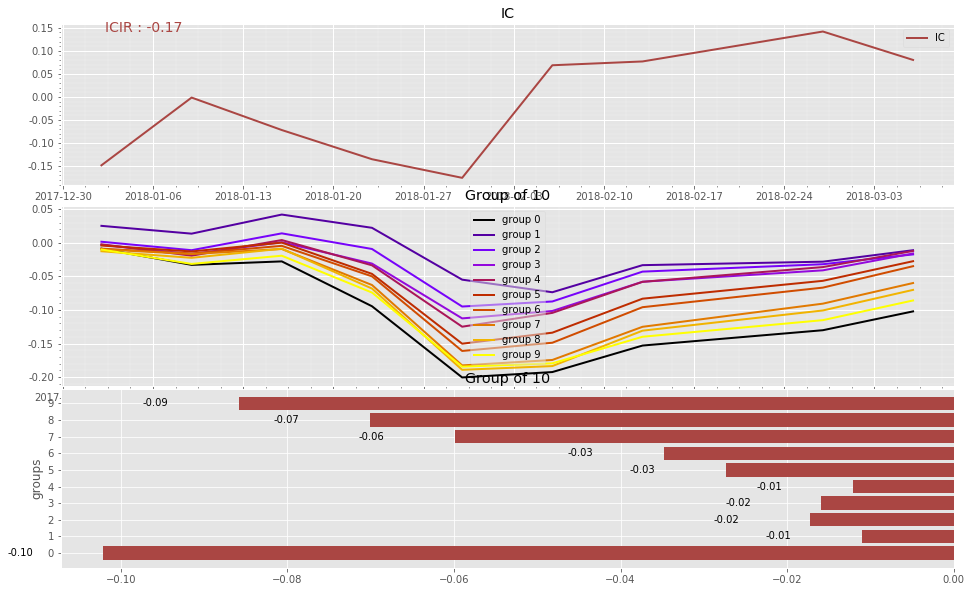

In [2]:
# evaluateFileDemo
from rqalpha.mod.rqalpha_mod_alphaStar_factors import evaluate_file

config = {
  "base": {
    "start_date": "2018-01-01",
    "end_date": "2018-04-01",
  },
}

factor_file_path = "./pe.ipynb"

evaluate_file(factor_file_path=factor_file_path,config=config,config_file = "../config_factor.yml")

In [ ]:
%load_ext rqalpha.mod.rqalpha_mod_alphaStar_factors
%evaluate -s 20170101 -e 20170131 -f ./testFactor.ipynb -rt r --config ../config_factor.yml